In [1]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../src')))

In [2]:
import matplotlib.pyplot as plt
from basics.point import Point
from basics.line import Line
from algorithms.line_intersection import line_intersection, do_lines_intersect, line_segment_intersection

def plot_lines_and_intersection(line1, line2, segment=False):
    plt.figure(figsize=(10, 10))
    
    # Plot lines
    plt.plot([line1.point1.x, line1.point2.x], [line1.point1.y, line1.point2.y], 'b-', label='Line 1')
    plt.plot([line2.point1.x, line2.point2.x], [line2.point1.y, line2.point2.y], 'r-', label='Line 2')
    
    # Find and plot intersection
    if segment:
        intersection = line_segment_intersection(line1, line2)
    else:
        intersection = line_intersection(line1, line2)
    
    if intersection:
        plt.plot(intersection.x, intersection.y, 'go', markersize=10, label='Intersection')
    
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
    plt.title('Line Intersection' if not segment else 'Line Segment Intersection')
    plt.show()

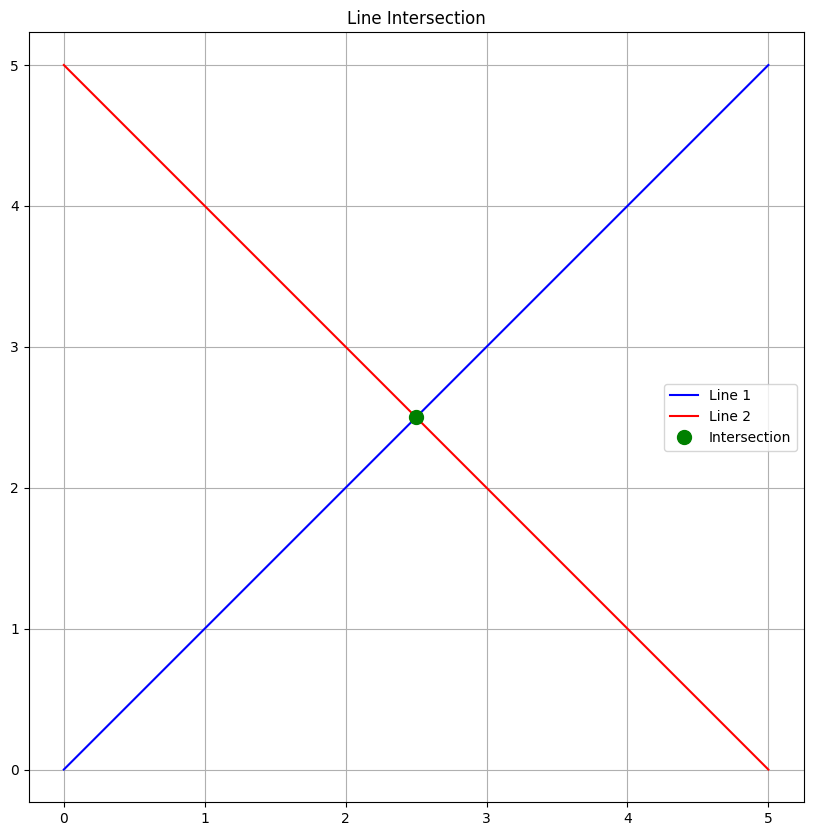

In [3]:
line1 = Line(Point(0, 0), Point(5, 5))
line2 = Line(Point(0, 5), Point(5, 0))
plot_lines_and_intersection(line1, line2)

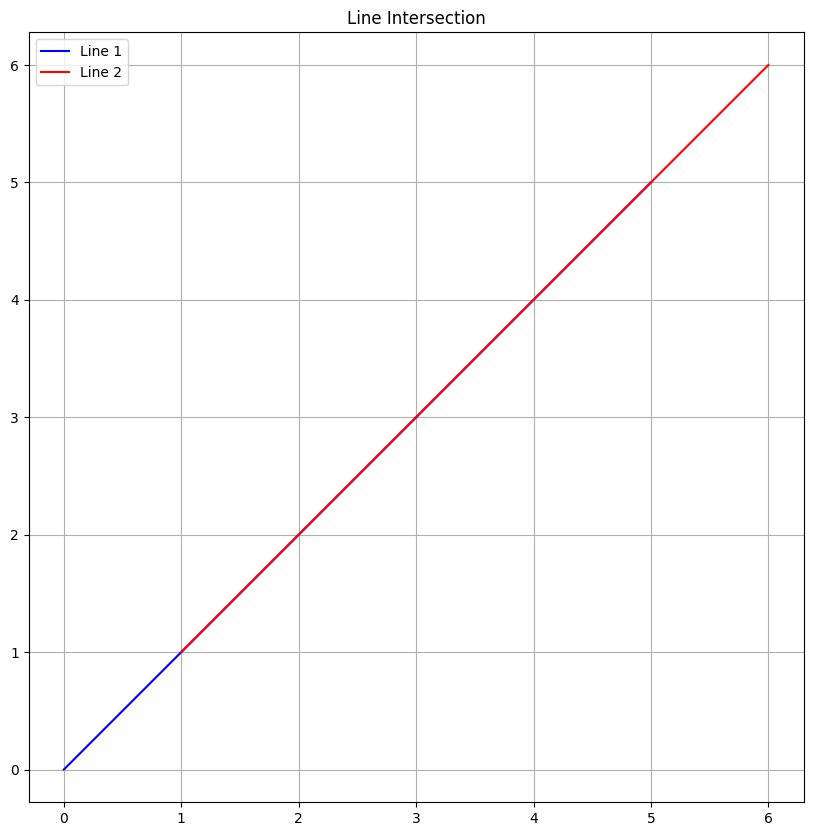

In [4]:
line1 = Line(Point(0, 0), Point(5, 5))
line2 = Line(Point(1, 1), Point(6, 6))
plot_lines_and_intersection(line1, line2)

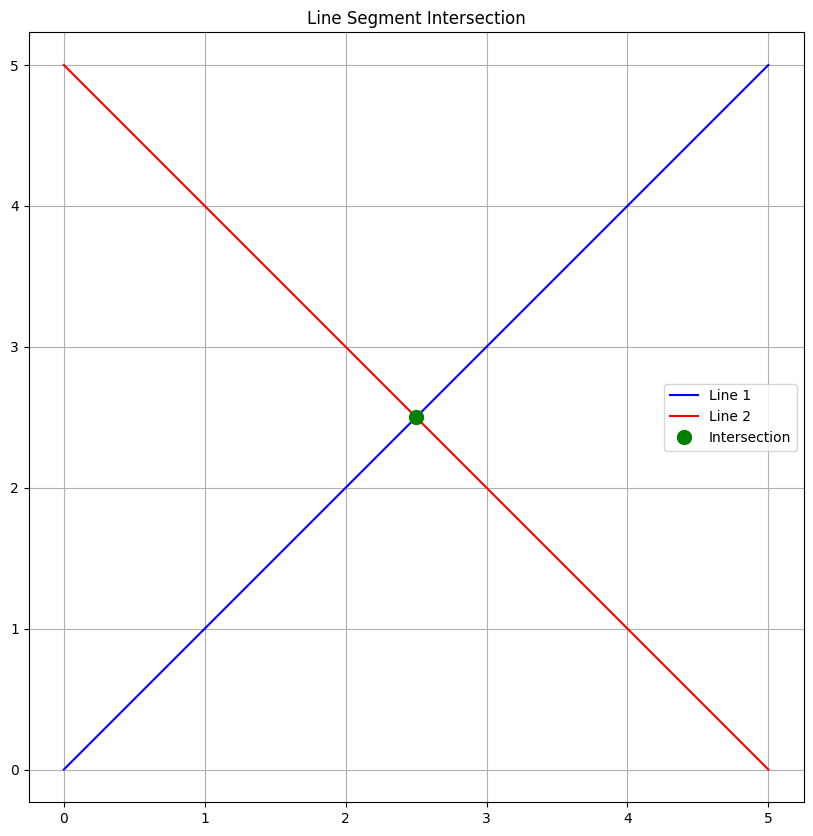

In [5]:
line1 = Line(Point(0, 0), Point(5, 5))
line2 = Line(Point(0, 5), Point(5, 0))
plot_lines_and_intersection(line1, line2, segment=True)

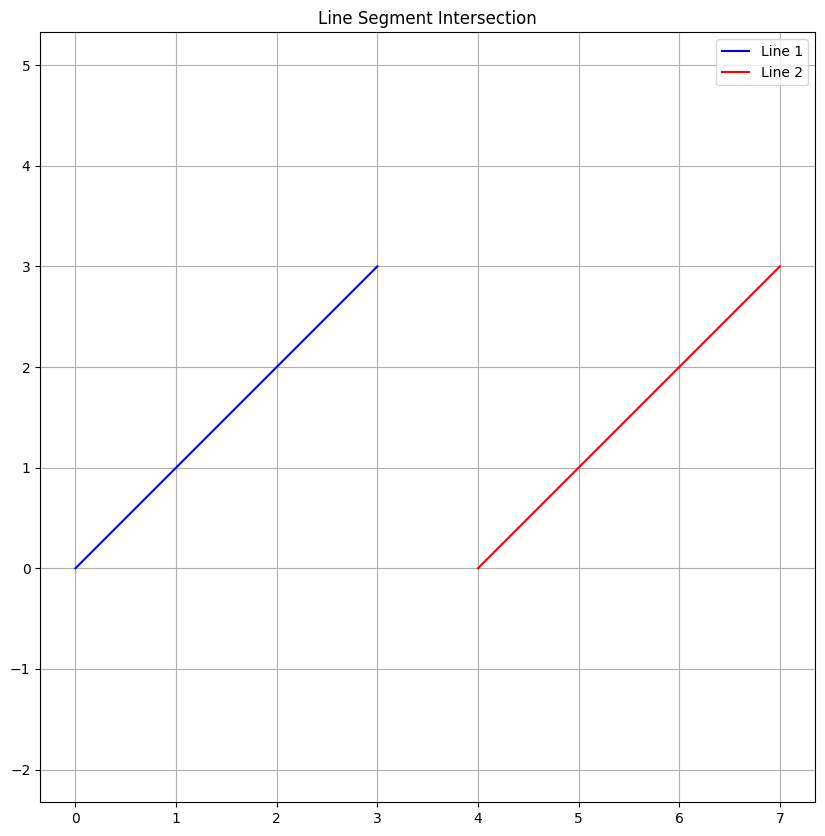

In [6]:
line1 = Line(Point(0, 0), Point(3, 3))
line2 = Line(Point(4, 0), Point(7, 3))
plot_lines_and_intersection(line1, line2, segment=True)

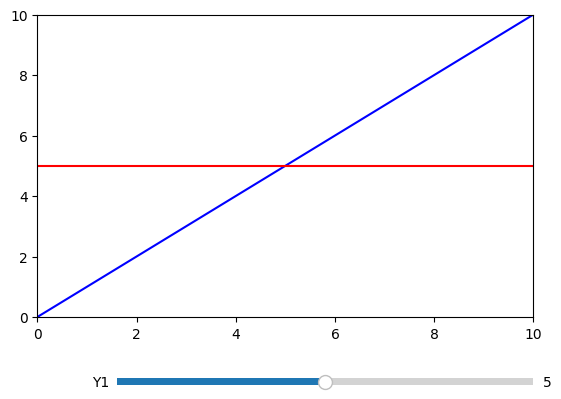

In [7]:
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.25)

line1 = Line(Point(0, 0), Point(10, 10))
line2 = Line(Point(0, 5), Point(10, 5))

l1, = ax.plot([line1.point1.x, line1.point2.x], [line1.point1.y, line1.point2.y], 'b-', label='Line 1')
l2, = ax.plot([line2.point1.x, line2.point2.x], [line2.point1.y, line2.point2.y], 'r-', label='Line 2')

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

ax_y1 = plt.axes([0.25, 0.1, 0.65, 0.03])
y1_slider = Slider(ax_y1, 'Y1', 0, 10, valinit=5)

def update(val):
    y1 = y1_slider.val
    line2 = Line(Point(0, y1), Point(10, y1))
    l2.set_ydata([line2.point1.y, line2.point2.y])
    fig.canvas.draw_idle()

y1_slider.on_changed(update)

plt.show()